In [1]:
import matplotlib.pyplot as plt
import h5py as h5
import numpy as np
import os
import pandas as pd

In [2]:
# path to study pam_study_4
path_to_study = "/home/hargy/Documents/3CS/repo_data3cs/data3cs/studies/pam_study_4"

# path to collections, and list of hdf5 files in each collection
path_to_coll1 = f'{path_to_study}/coll1' ; scans_coll1   = os.listdir(path_to_coll1)
path_to_coll2 = f'{path_to_study}/coll2' ; scans_coll2   = os.listdir(path_to_coll2)
path_to_coll3 = f'{path_to_study}/coll3' ; scans_coll3   = os.listdir(path_to_coll3)
path_to_coll4 = f'{path_to_study}/coll4' ; scans_coll4   = os.listdir(path_to_coll4)
path_to_coll5 = f'{path_to_study}/coll5' ; scans_coll5   = os.listdir(path_to_coll5)
path_to_coll6 = f'{path_to_study}/coll6' ; scans_coll6   = os.listdir(path_to_coll6)
path_to_coll7 = f'{path_to_study}/coll7' ; scans_coll7   = os.listdir(path_to_coll7)
path_to_coll8 = f'{path_to_study}/coll8' ; scans_coll8   = os.listdir(path_to_coll8)
path_to_coll9 = f'{path_to_study}/coll9' ; scans_coll9   = os.listdir(path_to_coll9)

In [3]:
def extract_data(path, ori, wl='450'):
    
    f = h5.File(path)
    gp = f['spectra'][wl][ori]['10.0sec']
    
    sp_data = gp['sp_data']; bg_data = gp['bg_data']; powers = gp['power_samples']
    
    return sp_data, bg_data, powers


def plot_data_fig(num, coll, ori, shape, it=3, w=25, h=25):
    
    plt.rcParams["figure.figsize"] = w,h
    
    """
    num: array; coll: array; ori: string; shape: tuple
    """
    
    fig, axs = plt.subplots(shape[0], shape[1]) ; axs = axs.flatten()
    
    num_count = 0
    for i in num:
        for j in coll:
            
            path_to_coll        = f'path_to_coll{j}'
            path_to_coll_val    = globals()[path_to_coll]
            
            sp_data, bg_data, powers = extract_data(f'{path_to_coll_val}/LiF_B2_{i}.hdf5', ori)
            
            axs[num_count].plot(sp_data[it]['em_wl'], sp_data[it]['count'],  label='Coll: {}\n Pw_sam: {:.2e}'.format(str(i), powers[it]))
            
        axs[num_count].legend()
        axs[num_count].set_xlabel('Emission Wavelength [nm]')
        axs[num_count].set_ylabel('Count')
        axs[num_count].set_title(f'LiF_B2_{i}')
        axs[num_count].grid('on')
        num_count+=1

In [4]:
# control and anneal groups
control = [141,145,150,152,156,157,159]; anneal = [143,144,146,147,154,155,158,160]

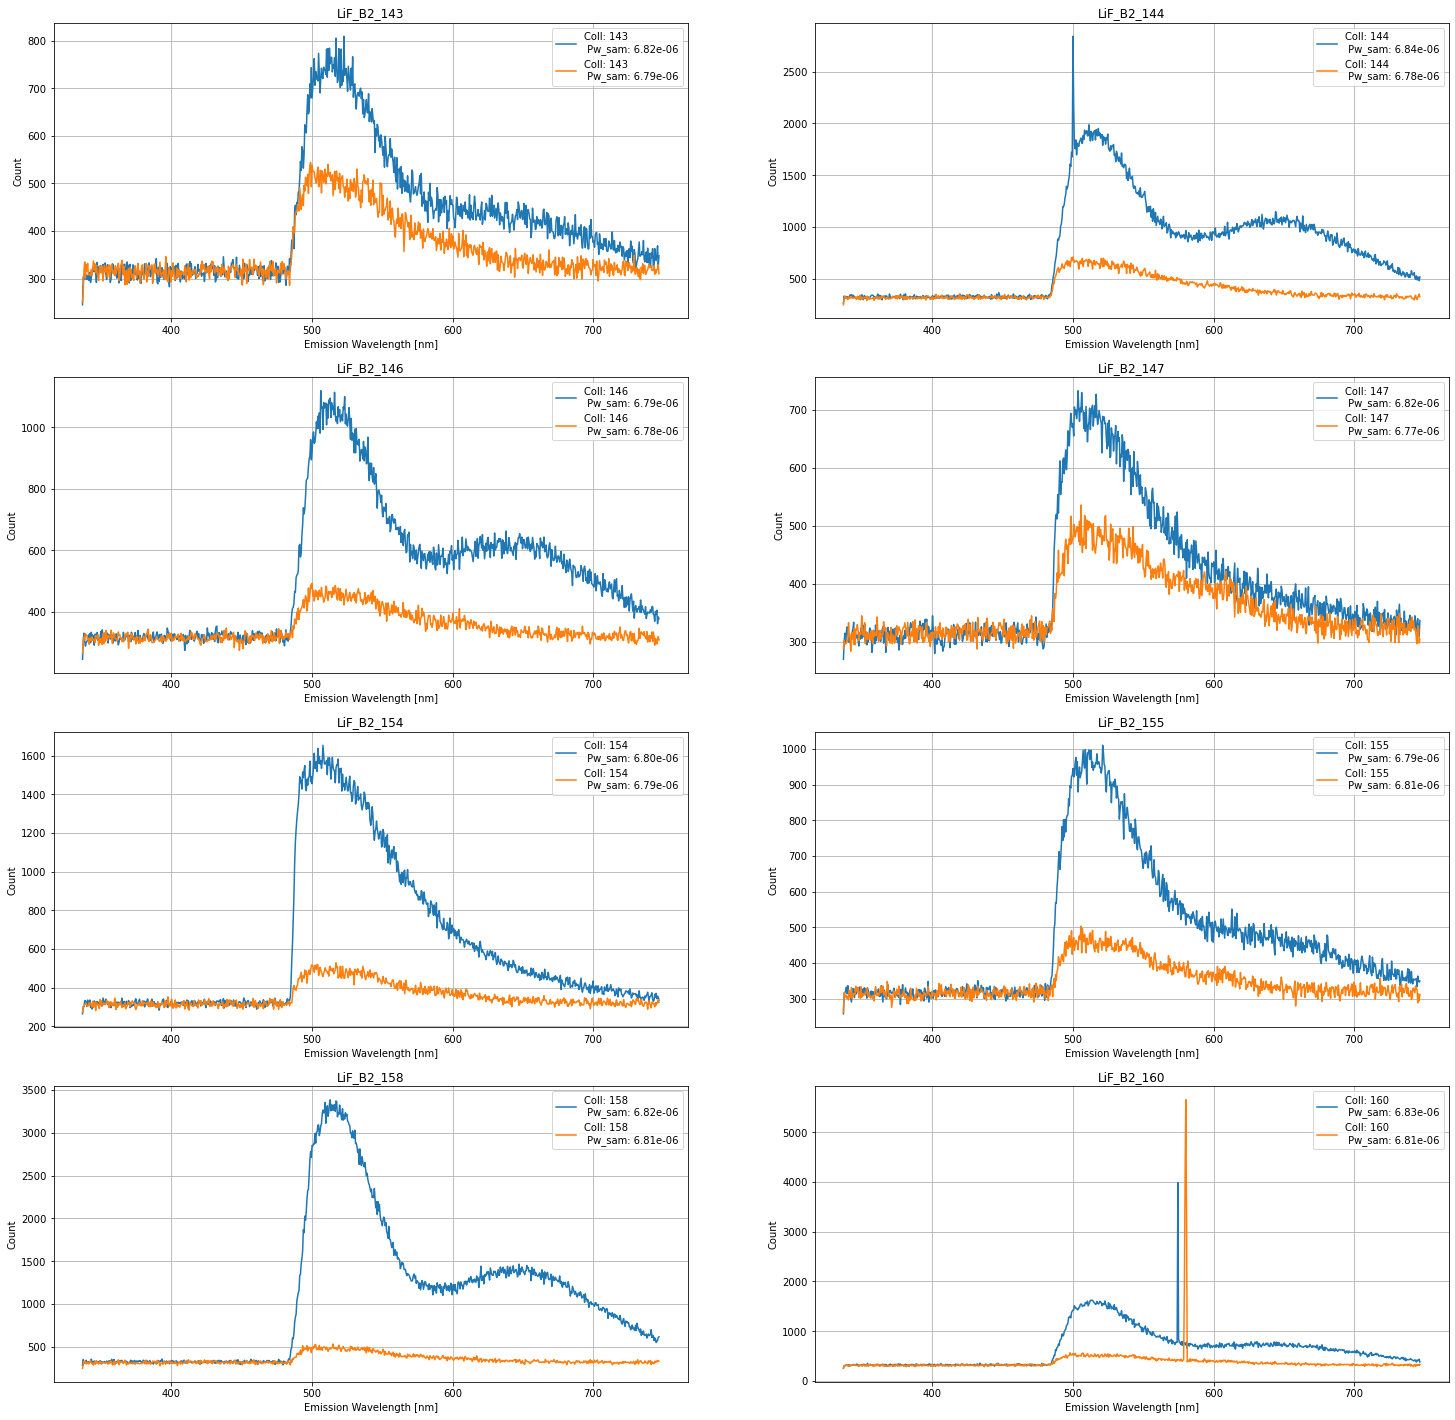

In [6]:
plot_data_fig(anneal, [6,8], '1', (4,2))

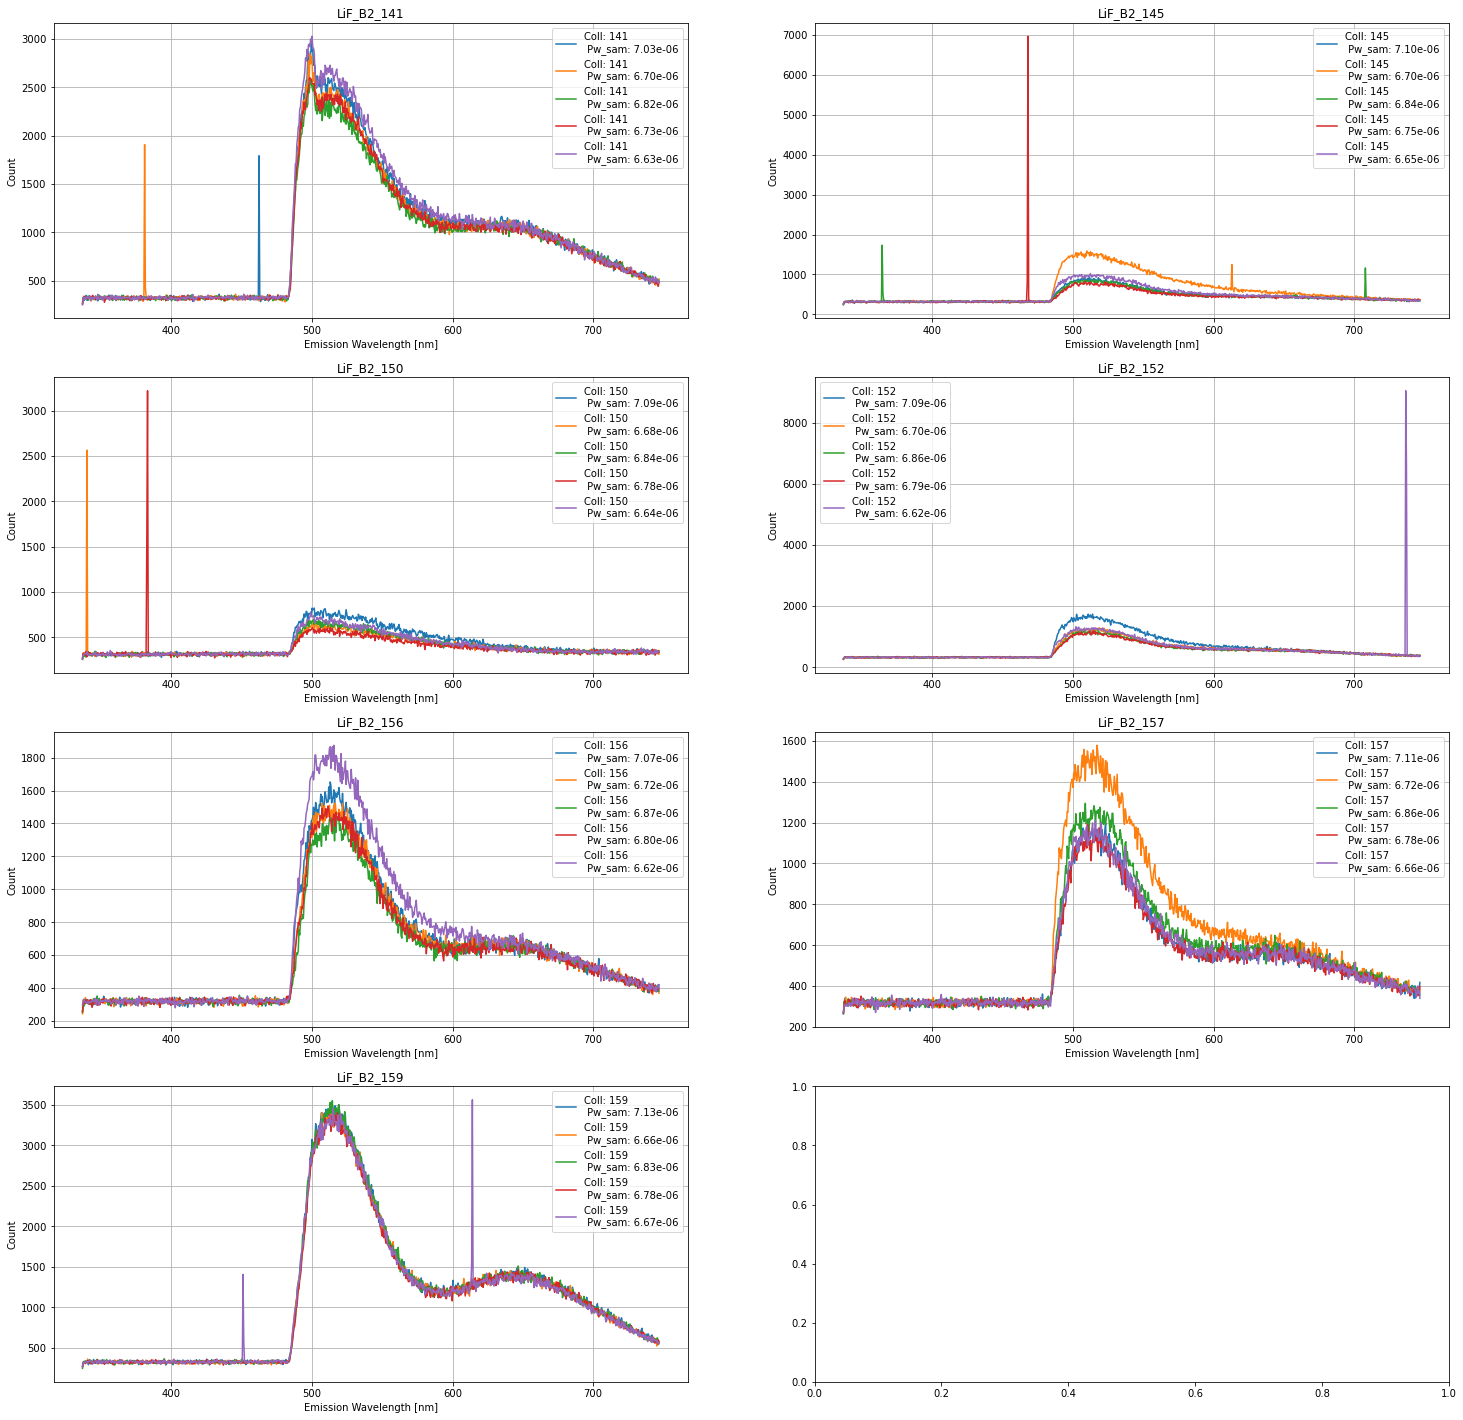

In [77]:
plot_data_fig(control, [1,3,5,7,9], '1', (4,2))